In [1]:
import mglearn
import matplotlib.pyplot as plt
#matplotlib inline

In [2]:
plt.style.use('seaborn-whitegrid')

/Users/hiraku/anaconda/envs/practice/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


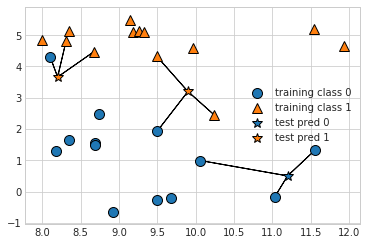

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [4]:
X, y = mglearn.datasets.make_forge()

/Users/hiraku/anaconda/envs/practice/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
X.shape

(26, 2)

In [6]:
y.shape

(26,)

## データの可視化

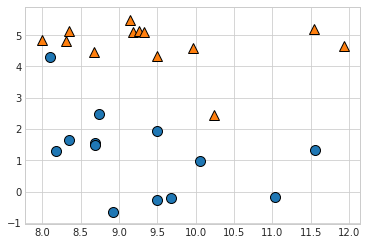

In [7]:
# 散布図
# 行と列をそれぞれ指定する
# 何行目→全部
# 何列目→0列目(横軸)
# 何列目→0列目(縦軸)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [9]:
# random_state=0 => ランダムだけど毎回同じ分割になる(ほかの端末でも同じ結果になる)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
X_train.shape

(19, 2)

In [11]:
X_test.shape

(7, 2)

In [12]:
clf = KNeighborsClassifier(n_neighbors=3)

In [13]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [14]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [15]:
y_test

array([1, 0, 1, 0, 1, 1, 0])

In [16]:
clf.score(X_test, y_test)

0.8571428571428571

In [17]:
round(clf.score(X_test, y_test), 3)

0.857

In [18]:
print("{:.2f}".format(clf.score(X_test, y_test)))

0.86


In [19]:
clf_10 = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
clf_10.score(X_test, y_test)

0.8571428571428571

In [20]:
for n_neighbors in range(1, 16):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    print("Test set accuracy : n_neighbors={}, {:.2f}".format(n_neighbors, clf.score(X_test, y_test)))

Test set accuracy : n_neighbors=1, 0.86
Test set accuracy : n_neighbors=2, 0.86
Test set accuracy : n_neighbors=3, 0.86
Test set accuracy : n_neighbors=4, 0.86
Test set accuracy : n_neighbors=5, 0.86
Test set accuracy : n_neighbors=6, 0.86
Test set accuracy : n_neighbors=7, 0.86
Test set accuracy : n_neighbors=8, 0.86
Test set accuracy : n_neighbors=9, 0.86
Test set accuracy : n_neighbors=10, 0.86
Test set accuracy : n_neighbors=11, 0.86
Test set accuracy : n_neighbors=12, 0.86
Test set accuracy : n_neighbors=13, 0.86
Test set accuracy : n_neighbors=14, 0.86
Test set accuracy : n_neighbors=15, 0.86


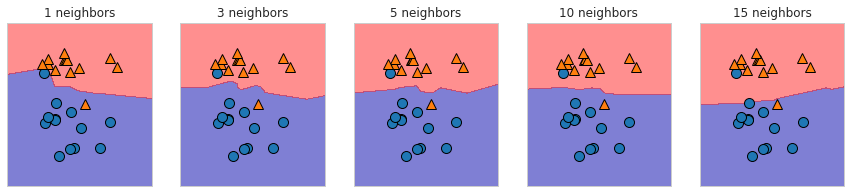

In [21]:
# subplots -> グラフを描画するキャンバスを用意
# 1行5列のグラフ
# figsize:大きさ(適当)
# fig -> 1 window
# axes -> 5 tab
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for n_neighbors, ax in zip([1, 3, 5, 10, 15], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # plot_2d_separator -> グラフを2つの領域に分割
    # 第1引数 : 分類のモデル
    # 第2引数 : 入力データ
    # fill=True : 2つの領域を色を塗る
    # ax : どの軸に描くのか指定(5つをfor文で順に指定)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, ax=ax, alpha=0.5)
    # discrete_scatter : 散布図を描く
    mglearn.discrete_scatter(X[:, 0], X[0:, 1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))

plt.show()

In [22]:
from sklearn.datasets import load_breast_cancer

In [23]:
cancer = load_breast_cancer()

In [24]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [25]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [26]:
cancer.data.shape

(569, 30)

In [27]:
import pandas as pd

In [28]:
df_cancer_feature = pd.DataFrame(cancer.feature_names)

In [29]:
df_cancer_feature

,0
0,mean radius
1,mean texture
2,mean perimeter
3,mean area
4,mean smoothness
5,mean compactness
6,mean concavity
7,mean concave points
8,mean symmetry
9,mean fractal dimension


In [30]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

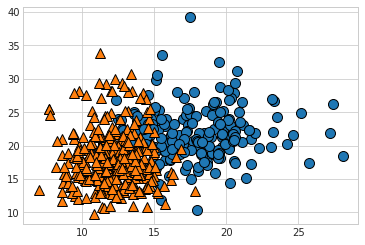

In [31]:
mglearn.discrete_scatter(cancer.data[:, 0], cancer.data[:, 1], cancer.target)

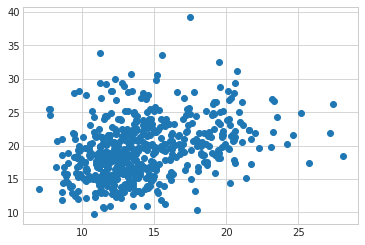

In [32]:
plt.scatter(cancer.data[:,0], cancer.data[:,1])
plt.show()

In [33]:
# 青色のデータだけを取る
# -> dataの内、cancer.target == 0のもののみを取得
X_1_blue = cancer.data[:,0][cancer.target == 0]
X_2_blue = cancer.data[:,1][cancer.target == 0]

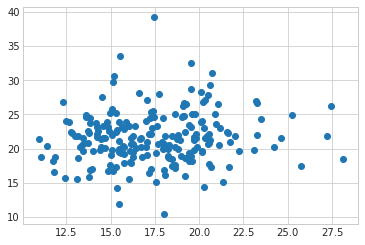

In [34]:
plt.scatter(X_1_blue, X_2_blue)

In [35]:
X_1_red = cancer.data[:,0][cancer.target == 1]
X_2_red = cancer.data[:,1][cancer.target == 1]

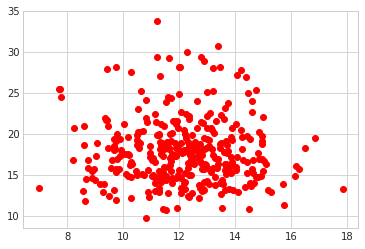

In [36]:
plt.scatter(X_1_red, X_2_red, c='red')

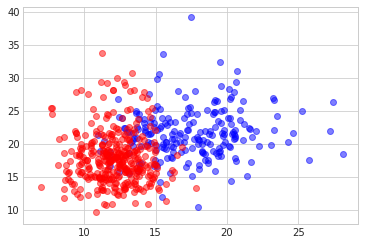

In [37]:
plt.scatter(X_1_blue, X_2_blue, c='blue', alpha=0.5)
plt.scatter(X_1_red, X_2_red, c='red', alpha=0.5)

In [38]:
# stratify : 割合を保ったままデータを分割 -> 割合を保ってほしい項目を指定
#  => randomにデータを分割した際に偏り(trainに0が多いなど)が出るのを防ぐ
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [39]:
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [40]:
clf.predict(X_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [41]:
clf.score(X_test, y_test)

0.916083916083916